In [29]:
%run common.ipynb

Tensorflow version: 1.14.0
Keras version: 2.2.4
Numpy version: 1.20.3


In [30]:
data = load_training_data()
test_data = load_testing_data()

In [31]:
keras_model, keras_model_weights, keras_model_json = load_trained_model()

In [32]:
# Recompile model
opt = keras.optimizers.Adam(lr=0.0001)
keras_model.compile(optimizer=opt, loss='binary_crossentropy')

In [33]:
# Fit model
keras_model.fit(x=data.onehot, y=data.labels, epochs=20, shuffle=True)

Epoch 1/20
40000/40000 [==============================] - 9s 218us/step - loss: 0.8068
Epoch 2/20
40000/40000 [==============================] - 7s 177us/step - loss: 0.3130
Epoch 3/20
40000/40000 [==============================] - 9s 220us/step - loss: 0.2575
Epoch 4/20
40000/40000 [==============================] - 8s 212us/step - loss: 0.2312
Epoch 5/20
40000/40000 [==============================] - 9s 217us/step - loss: 0.2167
Epoch 6/20
40000/40000 [==============================] - 8s 211us/step - loss: 0.2029
Epoch 7/20
40000/40000 [==============================] - 9s 221us/step - loss: 0.1903
Epoch 8/20
40000/40000 [==============================] - 9s 222us/step - loss: 0.1839
Epoch 9/20
40000/40000 [==============================] - 8s 207us/step - loss: 0.1746
Epoch 10/20
40000/40000 [==============================] - 9s 214us/step - loss: 0.1736
Epoch 11/20
40000/40000 [==============================] - 9s 215us/step - loss: 0.1677
Epoch 12/20
40000/40000 [================

0.9929343333333334


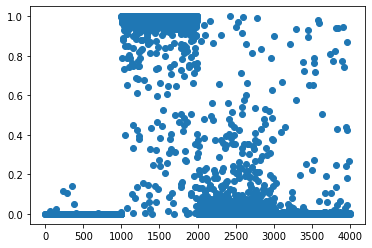

In [25]:
output = np.average(keras_model.predict(x=test_data.onehot), axis=1)

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_data.labels[:, 0], output)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

import matplotlib.pyplot as plt
plt.plot(range(len(output)), output, 'o');

In [27]:
# Save model
keras_model.save_weights("model.h5")
model_json = keras_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [28]:
print(output[:10])

[2.9514233e-05 2.4239223e-06 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 2.0563602e-06 0.0000000e+00 6.6359839e-06 1.0281801e-05]
